In [1]:
import numpy as np
from  matplotlib import pyplot as plt
import cv2


In [2]:
img  = cv2.imread("sample_data/mobil.png")

In [3]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [4]:
dft = np.fft.fft2(img_gray)

In [5]:
dft_shifted = np.fft.fftshift(dft)

In [6]:
h_ideal = np.zeros_like(dft_shifted)
radius = 30
center = (dft_shifted.shape[0] // 2, dft_shifted.shape[1] // 2)

In [7]:
x, y = np.ogrid[0:dft_shifted.shape[0], 0:dft_shifted.shape[1]]
h_ideal = np.where(np.sqrt((x - center[0])**2 + (y - center[1])**2) <= radius, 1, 0)

In [8]:
filtered_dft = dft_shifted * h_ideal

In [9]:
filtered_img = np.fft.ifft2(np.fft.ifftshift(filtered_dft))

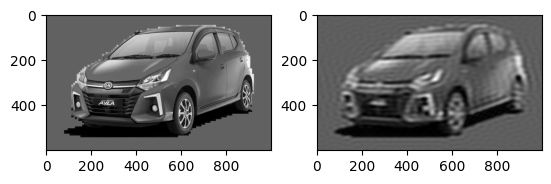

In [10]:
plt.subplot(121), plt.imshow(img_gray, cmap='gray')
plt.subplot(122), plt.imshow(np.abs(filtered_img), cmap='gray')
plt.show()